# Bank Marketing

### Author
    - Ryuu Ishita (ID: 270190242)
    - Yoobee College of Creative Innovation Auckland City Road Campus
    
### Dataset
    - The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
    - The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Report Contents
     1. Load libraries
     2. Load dataset
     3. Exploratory Data Analysis (EDA)
     4. Pre-processing
     5. Create a model & Evaluation
     6. Model comparison
     7. Summary
     8. Comparison with criteria
     9. Additional questions 

### Model used in evaluation
##### Machine Learning 
    1. Decision Tree
    2. Random Forest
    3. XGBoost
    4. Logistic Regression
    5. KNN
    6. SVM
    7. Naive Bayes
 
##### Deep Learning
    1. Neural Network

## 1. Load libraries

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 2. Load dataset

In [3]:
# Read CSV file
df = pd.read_csv("/Users/Ryuuu/Python/20_Yoobee/CS204/Assessment 2/bank/bank-full.csv", sep=';')

# Show all columns
pd.set_option("display.max_columns", None)

In [4]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

## 3. Exploratory Data Analysis (EDA)

In [5]:
df.shape

(45211, 17)

In [6]:
df.describe(include = "all")

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

### 3.1 Profiling

In [7]:
from pandas_profiling import ProfileReport

/Users/Ryuuu/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/Ryuuu/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
/var/folders/g2/x8kbv4kd79s7rrkz1k5k4f2m0000gn/T/ipykernel_92160/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by 

In [8]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Download report
# profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.2 Analysis

#### Variables
##### 1. Age:
    -->The most customer data is for people in their 30s 
        (32 years old has the highest number of customers (2085 samples, accounting for 4.6%))
        
##### 2. Job:
    -->There are 12 distinct types of occupations, the most common being Blue-color (9732 samples, 21.5%)
    
##### 3. Marital:
    -->There are 3 distinct types, the most common being married (27214 samples, 60.2%)

##### 4. Education:
    -->There are3 distinct types, the most common is secondary (Education level) (23202 samples, 51.3%)

##### 5. Default:
    -->98.2% of data has no defaults

##### 6. Balance:
    -->Need to take a closer look
    
##### 7. Housing:
    -->More than half of the data have a housing loan (55.6%)

##### 8. Loan:
    -->Most of the data don't have a personal loan (84.0%)

##### 9. Contact:
    -->There are 3 distinct types, the most common is using cellular (29285 samples, 64.8%%)

##### 10. Day:
    -->Relatively there is a high number of contacts around 20 days

##### 11. Month:
    -->May has the highest number of contacts (13766 samples, 30.4%)

##### 12. Duration:
    -->Continuous data with a peak of around 124
    
##### 13. Campaign:
    -->The number of contacts performed during this campaign (1 or 2 in the majority) 

##### 13. Pdays:
    -->Number of days that passed by after the client was last contacted from a previous campaign. Numeric; -1 means the client was not previously contacted (81.7% was not previously contacted)

##### 14. Previous:
    -->Number of contacts performed before this campaign (0 in the majority)

##### 15. Poutcome:
    -->The outcome of the previous marketing campaign (81.7% is unknown)

##### 16. y (Taarget):
    -->88.3% of the data don't subscribe to a term deposit. There is a data bias.

#### Correlations
--> Regarding the correlation between y and variables, duration is the largest (0.364), followed by outcome(0.312), month(0.26), pdays(0.192), age(0.155), contact(0.151).

#### Missing value
--> Since there is no Missing value, so currently no need to delete data using the drop function and so on.

### 3.3 Application probability
    -->Relationship between explanatory variables and objective variable

In [11]:
#  Convert categorical variables into dummy or indicator variables
df["y"] = df["y"].apply(lambda x : 0 if x =="no" else 1)

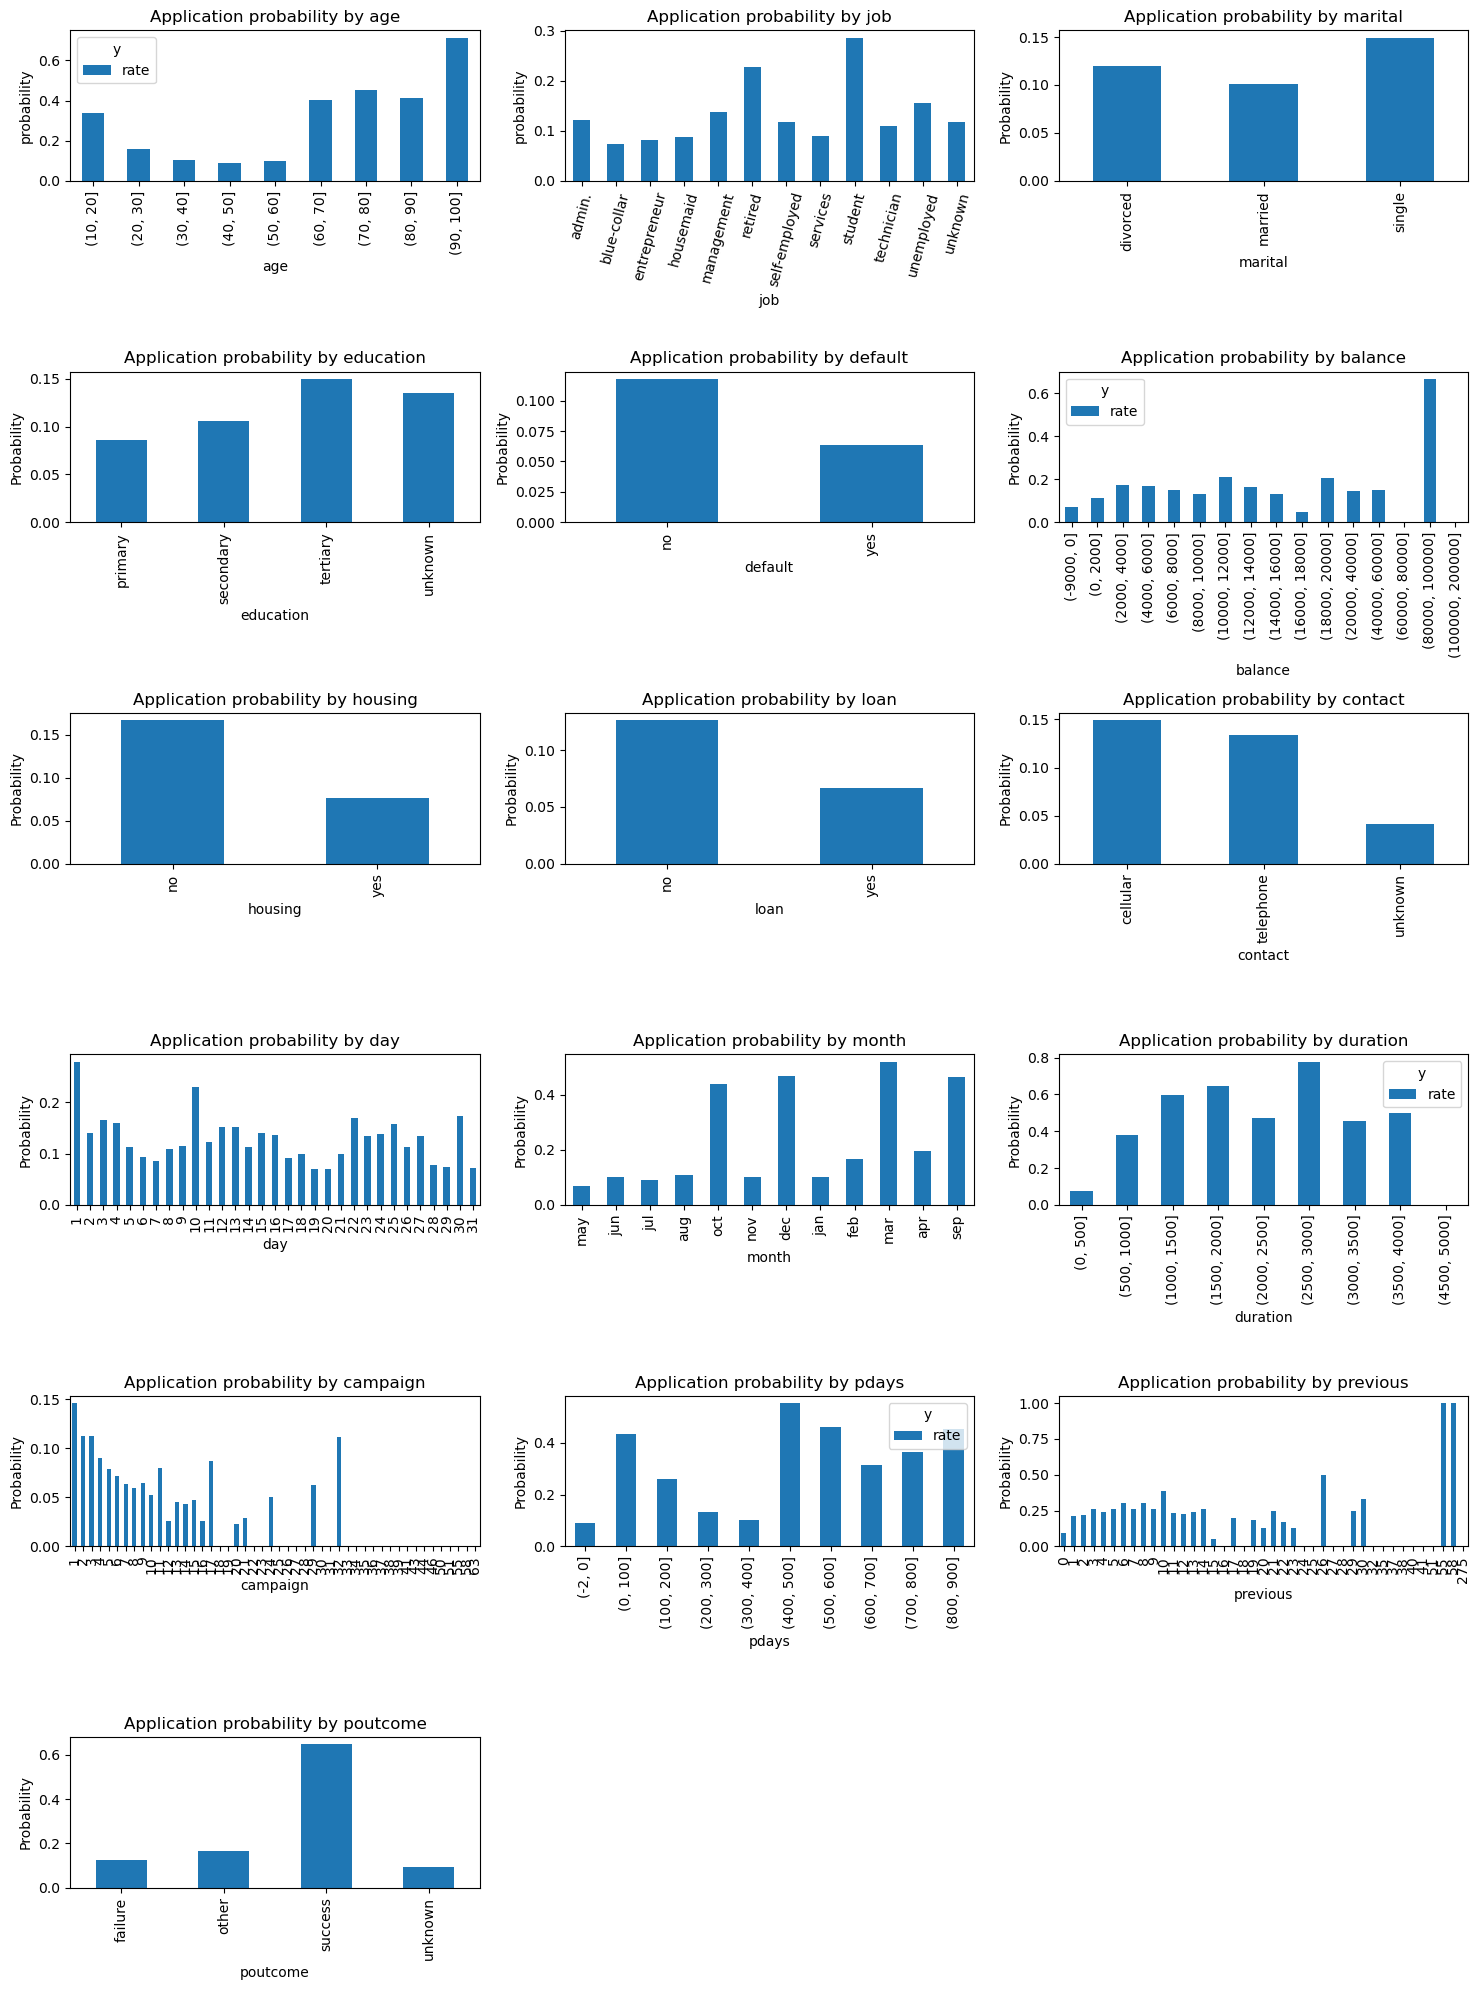

In [12]:
# Create subplots
fig, axs = plt.subplots(6, 3, figsize=(15, 20))

# age 
# df.groupby('age')['y'].mean().plot.bar(ax=axs[0, 0])
age_binning = pd.cut(df["age"],[0,10,20,30,40,50,60,70,80,90,100])         # Binning since there are many x values
age_crosstab = pd.crosstab(age_binning, df["y"], margins=True)
age_crosstab["rate"] = age_crosstab[1] / age_crosstab["All"]
age_crosstab.iloc[0:9,3:].plot.bar(ax=axs[0, 0])
axs[0, 0].set_title('Application probability by age')
axs[0, 0].set_xlabel('age')
axs[0, 0].set_ylabel('probability')

# job
df.groupby('job')['y'].mean().plot.bar(ax=axs[0, 1])
axs[0, 1].set_title('Application probability by job')
axs[0, 1].set_xlabel('job')
axs[0, 1].set_ylabel('probability')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(),rotation=75)

# marital
df.groupby('marital')['y'].mean().plot.bar(ax=axs[0, 2])
axs[0, 2].set_title('Application probability by marital')
axs[0, 2].set_xlabel('marital')
axs[0, 2].set_ylabel('Probability')

# education
df.groupby('education')['y'].mean().plot.bar(ax=axs[1, 0])
axs[1, 0].set_title('Application probability by education')
axs[1, 0].set_xlabel('education')
axs[1, 0].set_ylabel('Probability')

# default
df.groupby('default')['y'].mean().plot.bar(ax=axs[1, 1])
axs[1, 1].set_title('Application probability by default')
axs[1, 1].set_xlabel('default')
axs[1, 1].set_ylabel('Probability')

# balance
# df.groupby('balance')['y'].mean().plot.bar(ax=axs[1, 2])
balance_binning = pd.cut(df["balance"],[-9000,0,2000,4000,6000,8000,10000,12000, 14000, 16000, 18000, 20000, 40000, 60000, 80000, 100000, 200000])         # Binning since there are many x values
balance_crosstab = pd.crosstab(balance_binning, df["y"], margins=True)
balance_crosstab["rate"] = balance_crosstab[1] / balance_crosstab["All"]
balance_crosstab.iloc[0:16,3:].plot.bar(ax=axs[1, 2])
axs[1, 2].set_title('Application probability by balance')
axs[1, 2].set_xlabel('balance')
axs[1, 2].set_ylabel('Probability')

# housing
df.groupby('housing')['y'].mean().plot.bar(ax=axs[2, 0])
axs[2, 0].set_title('Application probability by housing')
axs[2, 0].set_xlabel('housing')
axs[2, 0].set_ylabel('Probability')

# loan
df.groupby('loan')['y'].mean().plot.bar(ax=axs[2, 1])
axs[2, 1].set_title('Application probability by loan')
axs[2, 1].set_xlabel('loan')
axs[2, 1].set_ylabel('Probability')

# contact
df.groupby('contact')['y'].mean().plot.bar(ax=axs[2, 2])
axs[2, 2].set_title('Application probability by contact')
axs[2, 2].set_xlabel('contact')
axs[2, 2].set_ylabel('Probability')

# day
df.groupby('day')['y'].mean().plot.bar(ax=axs[3, 0])
axs[3, 0].set_title('Application probability by day')
axs[3, 0].set_xlabel('day')
axs[3, 0].set_ylabel('Probability')

# month
df.groupby('month', sort = False)['y'].mean().plot.bar(ax=axs[3, 1])
axs[3, 1].set_title('Application probability by month')
axs[3, 1].set_xlabel('month')
axs[3, 1].set_ylabel('Probability')

# duration
# df.groupby('duration')['y'].mean().plot.bar(ax=axs[3, 2])
duration_binning = pd.cut(df["duration"],[0,500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])         # Binning since there are many x values
duration_crosstab = pd.crosstab(duration_binning, df["y"], margins=True)
duration_crosstab["rate"] = duration_crosstab[1] / duration_crosstab["All"]
duration_crosstab.iloc[0:9,3:].plot.bar(ax=axs[3, 2])
axs[3, 2].set_title('Application probability by duration')
axs[3, 2].set_xlabel('duration')
axs[3, 2].set_ylabel('Probability')

# campaign
df.groupby('campaign')['y'].mean().plot.bar(ax=axs[4, 0])
axs[4, 0].set_title('Application probability by campaign')
axs[4, 0].set_xlabel('campaign')
axs[4, 0].set_ylabel('Probability')

# pdays
# df.groupby('pdays')['y'].mean().plot.bar(ax=axs[4, 1])
pdays_binning = pd.cut(df["pdays"],[-2, 0,100, 200, 300, 400, 500, 600, 700, 800, 900])         # Binning since there are many x values
pdays_crosstab = pd.crosstab(pdays_binning, df["y"], margins=True)
pdays_crosstab["rate"] = pdays_crosstab[1] / pdays_crosstab["All"]
pdays_crosstab.iloc[0:10,3:].plot.bar(ax=axs[4, 1])
axs[4, 1].set_title('Application probability by pdays')
axs[4, 1].set_xlabel('pdays')
axs[4, 1].set_ylabel('Probability')

# previous
df.groupby('previous')['y'].mean().plot.bar(ax=axs[4, 2])
axs[4, 2].set_title('Application probability by previous')
axs[4, 2].set_xlabel('previous')
axs[4, 2].set_ylabel('Probability')

# poutcome
df.groupby('poutcome')['y'].mean().plot.bar(ax=axs[5, 0])
axs[5, 0].set_title('Application probability by poutcome')
axs[5, 0].set_xlabel('poutcome')
axs[5, 0].set_ylabel('Probability')

# Hide last subplot (empty)
axs[5, 1].axis('off')
axs[5, 2].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

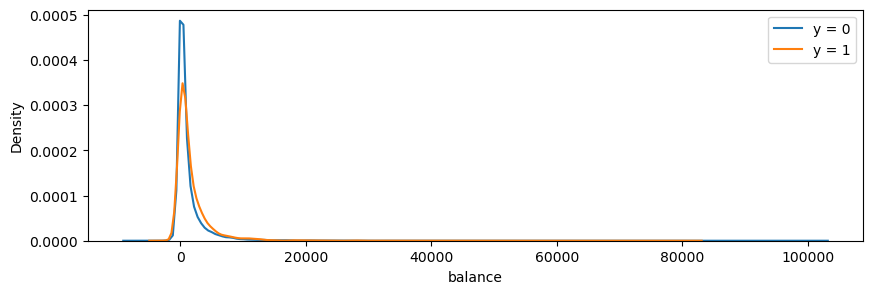

In [13]:
# Kernel Density Estimation (KDE) for balance
import seaborn as sns

plt.figure(figsize=(10, 3))
sns.kdeplot(df[df['y'] == 0]['balance'], label='y = 0')
sns.kdeplot(df[df['y'] == 1]['balance'], label='y = 1')
plt.legend()
plt.show()

### 3.4 Analysis

##### 1. Age:
    -->The probability tends to be high for 10-20 and over 60 years old.
        
##### 2. Job:
    -->The probability tends to be high for students and retired people.
    
##### 3. Marital:
    -->The probability tends to be high for single.

##### 4. Education:
    -->The probability tends to be high for tertiary students\
    -->It includes unknown values although there is no missing value

##### 5. Default, Housing, Loan:
    -->The probability tends to be high for no default and loans(including housing and personal)

##### 6. Balance:
    -->People with a large amount of balance seem to have a slightly higher application probability.

##### 7. Contact:
    -->Seems like no big difference\
    -->It includes unknown values although there is no missing value

##### 8. Day, Month:
    -->Specific month shows higher probability(Sep, Oct, Dec, Mar)

##### 9. Duration, Campaign:
    -->There seems to be a tendency for the application probability to decrease as the number of contacts during the campaign period increases, but there seem to be exceptions.

##### 10. Pdays:
    -->"-1" previously uncontacted people have a low probability\
    -->The probability is high shortly after the last contact and gradually decreases, and the probability rises again from the group after 400 days.

##### 11. Previous:
    -->The number of contacts before the campaign varies, so there seems to be individual differences

##### 12. Poutcome:
    -->There seems to be a high probability that the previous marketing campaign performed well
    
    
#### Personas
1. non-workers and single, such as students, etc.
2. Single or divorced seniors who have retired and have enough balance
3. Seniors with no debts or mortgages or personal loans
4. People interested in term deposits who participated in the previous campaign or were contacted

## 4. Pre-processing

In [14]:
# Convert "pdays" and "previous" into 0 and 1 since they can be distinguished based on whether there is a contact or not.
df["pdays"] = df["pdays"].apply(lambda x : 0 if x <= 0 else 1)
df["previous"] = df["previous"].apply(lambda x : 0 if x <= 0 else 1)

In [15]:
# Extract features and target
x = df.iloc[:, 0:16]
y = df["y"]

In [16]:
x.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1      0         0  unknown  
1  unknown    5   may       151         1      0         0  unknown  
2  unknown    5   may        76         1      0         0  unknown  
3  unknown    5   may        92         1      0         0  unknown  
4  unknown    5   may       198         1      0         0  unknown

In [17]:
#  Replace feature values (no = 0, yes = 1)
x = pd.get_dummies(x)
x = x.astype(int)
x.head()

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   58     2143    5       261         1      0         0           0   
1   44       29    5       151         1      0         0           0   
2   33        2    5        76         1      0         0           0   
3   47     1506    5        92         1      0         0           0   
4   33        1    5       198         1      0         0           0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               1   
1                0                 0              0               0   
2                0                 1              0               0   
3                1                 0              0               0   
4                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               1   
2            0                  0             0            0               0   
3            0                  0             0            0               0   
4            0                  0             0            0               0   

   job_unemployed  job_unknown  marital_divorced  marital_married  \
0               0            0                 0                1   
1               0            0                 0                0   
2               0            0                 0                1   
3               0            0                 0                1   
4               0            1                 0                0   

   marital_single  education_primary  education_secondary  education_tertiary  \
0               0                  0                    0                   1   
1               1                  0                    1                   0   
2               0                  0                    1                   0   
3               0                  0                    0                   0   
4               1                  0                    0                   0   

   education_unknown  default_no  default_yes  housing_no  housing_yes  \
0                  0           1            0           0            1   
1                  0           1            0           0            1   
2                  0           1            0           0            1   
3                  1           1            0           0            1   
4                  1           1            0           1            0   

   loan_no  loan_yes  contact_cellular  contact_telephone  contact_unknown  \
0        1         0                 0                  0                1   
1        1         0                 0                  0                1   
2        0         1                 0                  0                1   
3        1         0                 0                  0                1   
4        1         0                 0                  0                1   

   month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
3          0          0          1          0          0          0   
4          0          0          1          0          0  

In [18]:
# Normalize columns to 0-1 range
def normalize(df):
    df_normalized = df.copy()
    for column in df.columns:
        min_val = df[column].min()
        max_val = df[column].max()
        df_normalized[column] = (df[column] - min_val) / (max_val - min_val)
    return df_normalized

In [19]:
df_temp = x.iloc[:,:5]
df_temp = normalize(df_temp)

x["age"] = df_temp["age"]
x["balance"] = df_temp["balance"]
x["day"] = df_temp["day"]
x["duration"] = df_temp["duration"]
x["campaign"] = df_temp["campaign"]

In [20]:
x.head()

age   balance       day  duration  campaign  pdays  previous  \
0  0.519481  0.092259  0.133333  0.053070       0.0      0         0   
1  0.337662  0.073067  0.133333  0.030704       0.0      0         0   
2  0.194805  0.072822  0.133333  0.015453       0.0      0         0   
3  0.376623  0.086476  0.133333  0.018707       0.0      0         0   
4  0.194805  0.072812  0.133333  0.040260       0.0      0         0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0               0               0            0                 0   
1               1               0            0                 0   
2               0               0            0                 0   
3               0               0            0                 0   
4               0               0            1                 0   

   marital_married  marital_single  education_primary  education_secondary  \
0                1               0                  0                    0   
1                0               1                  0                    1   
2                1               0                  0                    1   
3                1               0                  0                    0   
4                0               1                  0                    0   

   education_tertiary  education_unknown  default_no  default_yes  housing_no  \
0                   1                  0           1            0           0   
1                   0                  0           1            0           0   
2                   0                  0           1            0           0   
3                   0                  1           1            0           0   
4                   0                  1           1            0           1   

   housing_yes  loan_no  loan_yes  contact_cellular  contact_telephone  \
0            1        1         0                 0                  0   
1            1        1         0                 0                  0   
2            1        0         1                 0                  0   
3            1        1         0                 0                  0   
4            0        1         0                 0                  0   

   contact_unknown  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                1          0          0          0          0          0   
1                1          0          0          0          0          0   
2                1          0          0          0          0          0   
3                1          0          0          0          0          0   
4                1          0          0          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0       

In [21]:
df_temp.min(), df_temp.max()

(age         0.0
 balance     0.0
 day         0.0
 duration    0.0
 campaign    0.0
 dtype: float64,
 age         1.0
 balance     1.0
 day         1.0
 duration    1.0
 campaign    1.0
 dtype: float64)

In [103]:
# Split dataset (8:2)
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)     # random_state = seed

In [23]:
X_train.shape, X_test.shape

((36168, 51), (9043, 51))

## 5. Create a model & Evaluation

### Options
#### Machine Learning 
 - Decision Tree
 - Random Forest
 - XGBoost
 - Logistic Regression
 - KNN
 - SVM
 - Naive Bayes
 
#### Deep Learning
 - Neural Network

### 1. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier as DT

In [25]:
model_1 = DT(max_depth=2, min_samples_leaf=500)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=500)

In [26]:
# Create a classification report
from sklearn.metrics import classification_report

pred_1 =  model_1.predict(X_test)
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7993
           1       0.59      0.35      0.44      1050

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043



### Confusion matrix

In [104]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]                             # normalize it
    n_classes = cm.shape[0]                                                                                                 # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)                                                 # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),                                                         # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels,                                                                    # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

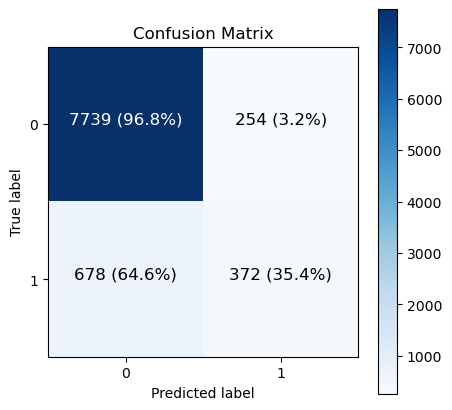

In [28]:
make_confusion_matrix(y_test, pred_1, classes=None, figsize=(5, 5), text_size=12)

### Improve with Grid Search CV

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
parameters = {"max_depth":list(range(2,11))}
# parameters = {"max_depth": list(range(2,11)),"min_samples_leaf": [5,10,20,50,100,500]}

In [31]:
from sklearn.model_selection import GridSearchCV

model_1a = DT()

model_1a = GridSearchCV(model_1a, parameters, cv=5,scoring="accuracy", n_jobs=-1, return_train_score=True)
model_1a.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy')

In [106]:
# model_1a.cv_results_

Text(0, 0.5, 'Accuracy')

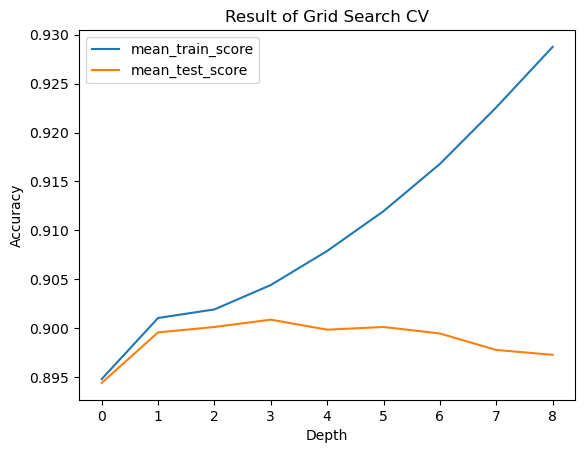

In [33]:
df_model_1_result = pd.DataFrame(model_1a.cv_results_)

df_model_1_result[["mean_train_score", "mean_test_score"]].plot()
plt.title("Result of Grid Search CV")
plt.xlabel("Depth")
plt.ylabel("Accuracy")

In [34]:
model_1a.best_params_

{'max_depth': 5}

In [35]:
model_1b = DT(max_depth = 5, min_samples_leaf=500)
# model_1b = DT(max_depth = 5)
model_1b.fit(X_train, y_train)

pred_1b = model_1b.predict(X_test)
print(classification_report(y_test, pred_1b))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7993
           1       0.58      0.42      0.49      1050

    accuracy                           0.90      9043
   macro avg       0.75      0.69      0.71      9043
weighted avg       0.89      0.90      0.89      9043



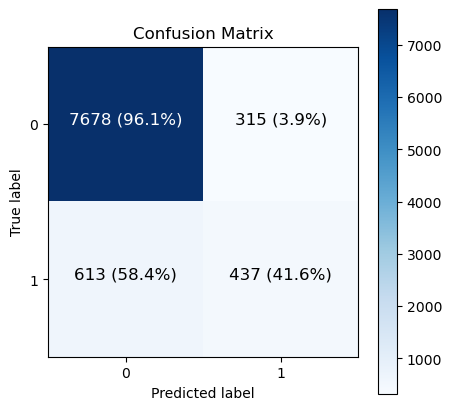

In [36]:
make_confusion_matrix(y_test, pred_1b, classes=None, figsize=(5, 5), text_size=12)

-->TN(True Negative) is improved slightly

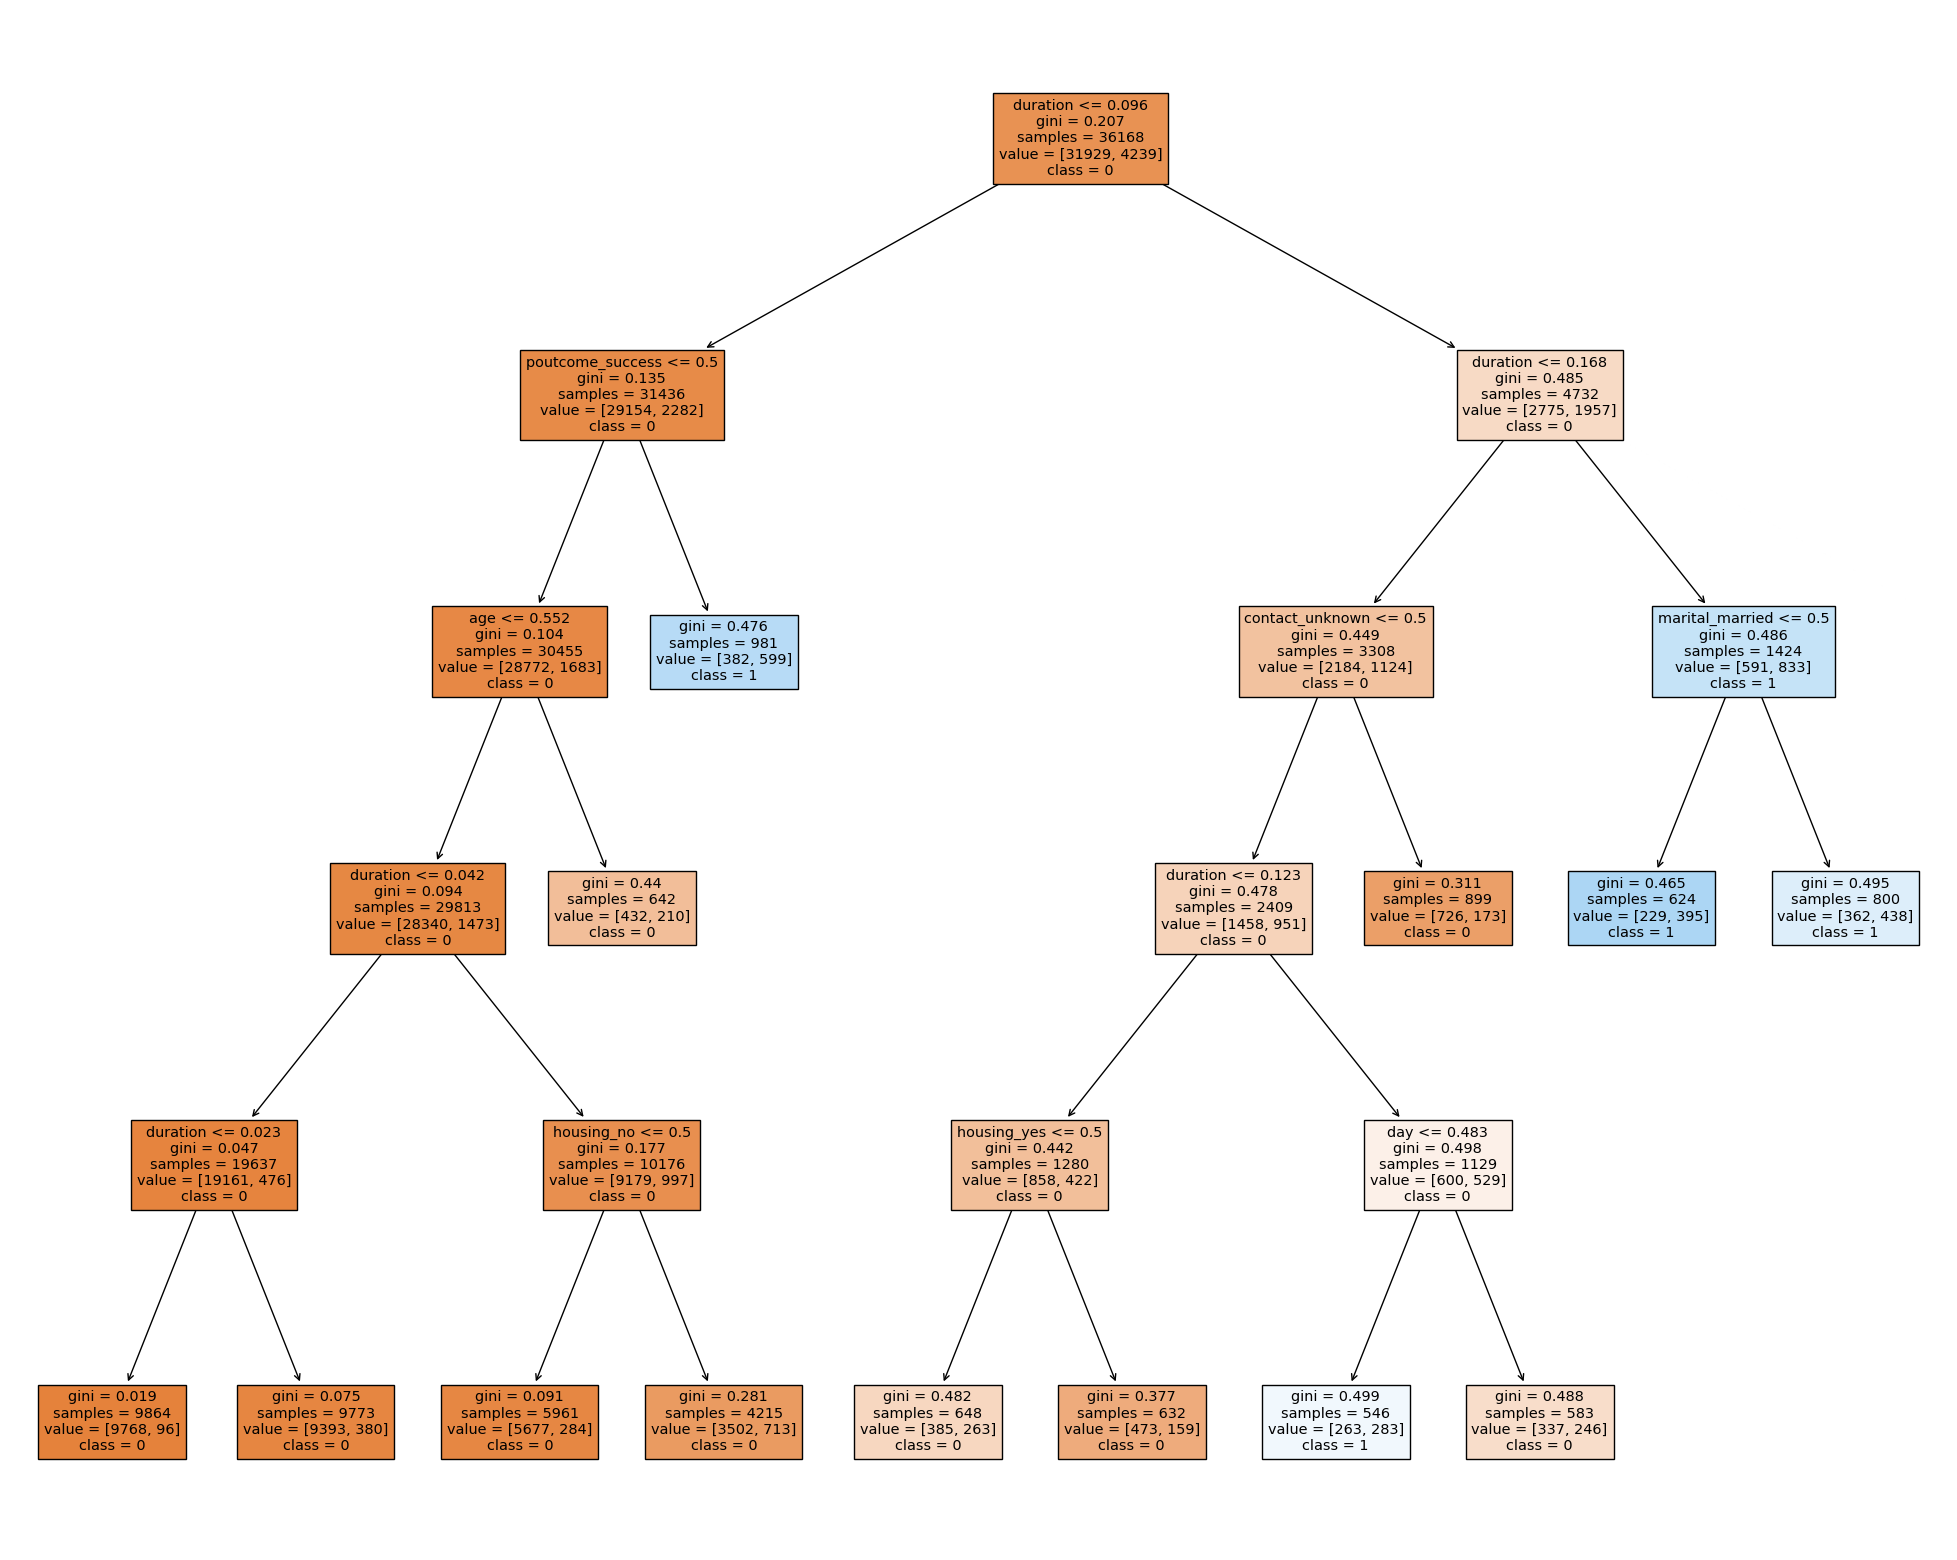

In [37]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_1b, 
                   feature_names= X_train.columns.tolist(),  
                   class_names=["0","1"],
                   filled=True)

In [38]:
print(classification_report(y_test, pred_1b))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7993
           1       0.58      0.42      0.49      1050

    accuracy                           0.90      9043
   macro avg       0.75      0.69      0.71      9043
weighted avg       0.89      0.90      0.89      9043



### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model_3 = RandomForestClassifier()

In [41]:
parameters = {'max_depth': [2,4,6,8,10], 'n_estimators': [50,100,200]}

In [42]:
model_3a = GridSearchCV(model_3, parameters, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True, verbose=1)
model_3a.fit(X_train, y_train)
print(model_3a.best_params_, model_3a.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'max_depth': 10, 'n_estimators': 200} 0.8981143776980456


In [43]:
model_3b = RandomForestClassifier(max_depth = 10, n_estimators = 50)
model_3b.fit(X_train, y_train)

pred_3b = model_3b.predict(X_test)
print(classification_report(y_test, pred_3b))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7993
           1       0.74      0.20      0.31      1050

    accuracy                           0.90      9043
   macro avg       0.82      0.60      0.63      9043
weighted avg       0.88      0.90      0.87      9043



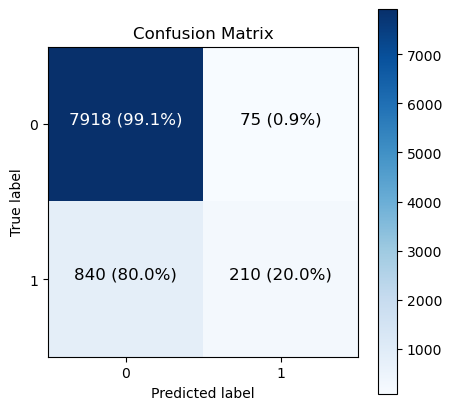

In [44]:
make_confusion_matrix(y_test, pred_3b, classes=None, figsize=(5, 5), text_size=12)

### XGBoost

In [45]:
import xgboost as xgb

model_2 = xgb.XGBClassifier()

In [46]:
parameters = {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}

In [47]:
model_2a = GridSearchCV(model_2, parameters, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True, verbose=1)
model_2a.fit(X_train, y_train)
print(model_2a.best_params_, model_2a.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 4, 'n_estimators': 100} 0.9082891361938519


In [48]:
model_2b = xgb.XGBClassifier(max_depth = 4, n_estimators = 100)
model_2b.fit(X_train, y_train)

pred_2b = model_2b.predict(X_test)
print(classification_report(y_test, pred_2b))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7993
           1       0.63      0.48      0.54      1050

    accuracy                           0.91      9043
   macro avg       0.78      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043



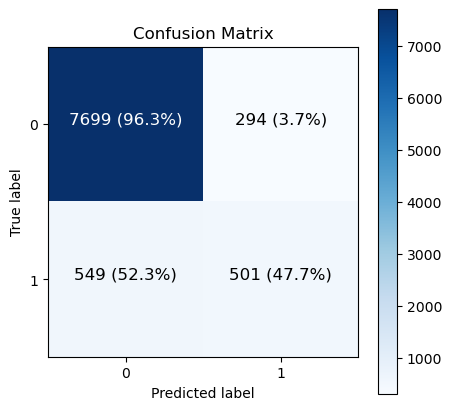

In [49]:
make_confusion_matrix(y_test, pred_2b, classes=None, figsize=(5, 5), text_size=12)

### LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model_4 = LogisticRegression()

In [52]:
# Define the hyperparameter
parameters = {
    'C': [0.1, 1.0, 10.0],           # Regularization parameter
    'penalty': ['l1', 'l2'],         # Regularization type
    'solver': ['liblinear', 'lbfgs'] # Optimization algorithm
}

In [53]:
model_4a = GridSearchCV(model_4, parameters, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True, verbose=1)
model_4a.fit(X_train, y_train)
print(model_4a.best_params_, model_4a.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/Ryuuu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Ryuuu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} 0.9020957457718538


In [54]:
model_4b = LogisticRegression(C = 1.0, penalty = "l1", solver = "liblinear")
model_4b.fit(X_train, y_train)

pred_4b = model_4b.predict(X_test)
print(classification_report(y_test, pred_4b))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7993
           1       0.63      0.33      0.43      1050

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



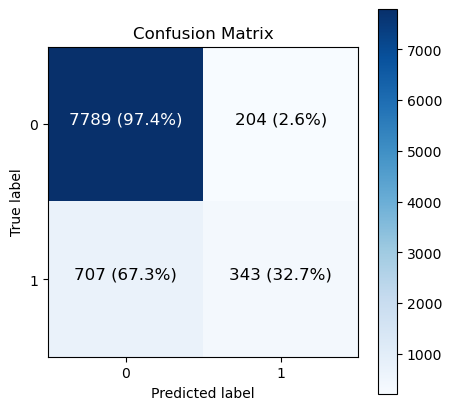

In [55]:
make_confusion_matrix(y_test, pred_4b, classes=None, figsize=(5, 5), text_size=12)

### SVM

In [56]:
from sklearn.svm import SVC

In [57]:
model_6 = SVC()

In [58]:
# Define the parameter s
parameters = {
    'C': [0.1, 1, 10, 100]
#     'kernel': ['linear', 'rbf'],
#     'gamma': [0.1, 1, 10]
}

In [59]:
model_6a = GridSearchCV(model_6, parameters, cv=5, scoring="accuracy")
model_6a.fit(X_train, y_train)
print(model_6a.best_params_, model_6a.best_score_)

{'C': 10} 0.9013768836126894


In [60]:
model_6b = SVC(C=10)
model_6b.fit(X_train, y_train)

pred_6b = model_6b.predict(X_test)
print(classification_report(y_test, pred_6b))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7993
           1       0.60      0.36      0.45      1050

    accuracy                           0.90      9043
   macro avg       0.76      0.67      0.70      9043
weighted avg       0.88      0.90      0.89      9043



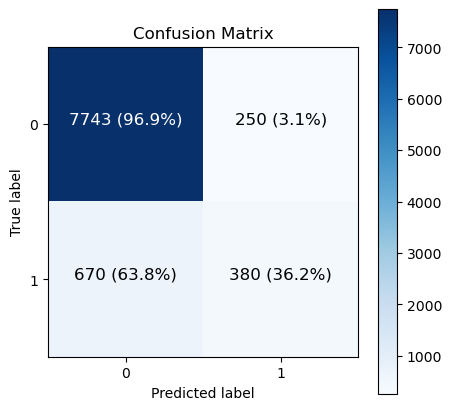

In [61]:
make_confusion_matrix(y_test, pred_6b, classes=None, figsize=(5, 5), text_size=12)

### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
model_7 = GaussianNB()

In [64]:
# Define the parameter grid
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [65]:
model_7a = GridSearchCV(model_7, parameters, cv=5, scoring="accuracy")
model_7a.fit(X_train, y_train)
print(model_7a.best_params_, model_7a.best_score_)

{'var_smoothing': 1e-05} 0.8453606926536787


In [66]:
model_7b = GaussianNB(var_smoothing = 1e-5)
model_7b.fit(X_train, y_train)

pred_7b = model_7b.predict(X_test)
print(classification_report(y_test, pred_7b))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7993
           1       0.37      0.52      0.43      1050

    accuracy                           0.84      9043
   macro avg       0.65      0.70      0.67      9043
weighted avg       0.87      0.84      0.85      9043



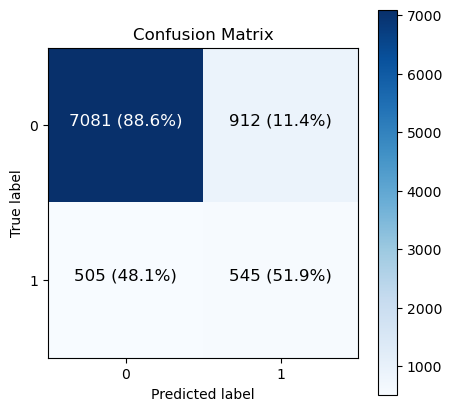

In [67]:
make_confusion_matrix(y_test, pred_7b, classes=None, figsize=(5, 5), text_size=12)

### Neural Network

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
# Set the random seed
tf.random.set_seed(10)

# Create the model
model_8 = Sequential([
  Dense(4, activation="relu"),
  Dense(4, activation="relu"),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),                                 # ideal learning rate (same as default)
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1131/1131 [==============================] - 1s 340us/step - loss: 0.3521 - accuracy: 0.8796 - val_loss: 0.2996 - val_accuracy: 0.8914
Epoch 2/5
1131/1131 [==============================] - 0s 285us/step - loss: 0.2899 - accuracy: 0.8926 - val_loss: 0.2749 - val_accuracy: 0.8937
Epoch 3/5
1131/1131 [==============================] - 0s 285us/step - loss: 0.2644 - accuracy: 0.8946 - val_loss: 0.2510 - val_accuracy: 0.8974
Epoch 4/5
1131/1131 [==============================] - 0s 290us/step - loss: 0.2436 - accuracy: 0.8991 - val_loss: 0.2362 - val_accuracy: 0.8998
Epoch 5/5
1131/1131 [==============================] - 0s 302us/step - loss: 0.2323 - accuracy: 0.9025 - val_loss: 0.2279 - val_accuracy: 0.9014


In [70]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 208       
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 233 (932.00 Byte)
Trainable params: 233 (932.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

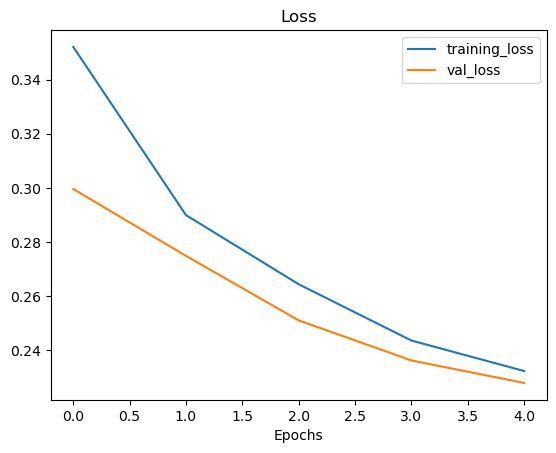

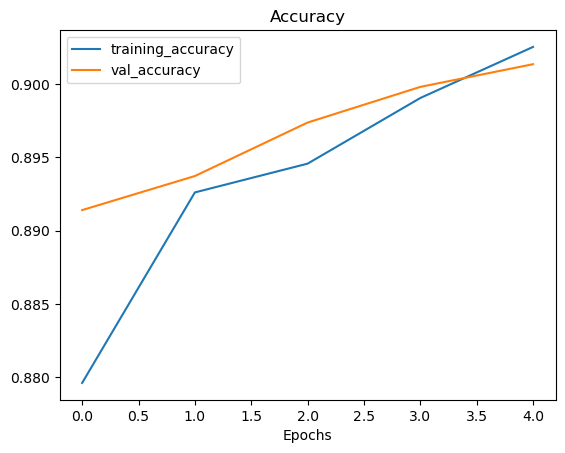

In [72]:
plot_loss_curves(history_8)

In [73]:
pred_8 = model_8.predict(X_test)
print(classification_report(y_test, tf.round(pred_8)))

283/283 [==============================] - 0s 245us/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7993
           1       0.61      0.41      0.49      1050

    accuracy                           0.90      9043
   macro avg       0.77      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



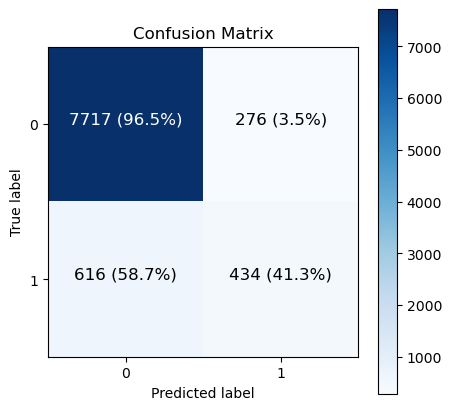

In [74]:
make_confusion_matrix(y_test, tf.round(pred_8), classes=None, figsize=(5, 5), text_size=12)

#### Improvement ideas
    1. Change the learning rate
    2. Adding layers
    3. Increase the number of hidden units
    4. Change the activation functions
    5. Change the optimization function
    6. Fitting on more data 
    7. Fitting for longer

-->From the above ideas, I will try 1, 3, and 7 which seem likely to improve.

#### 1. Finding the best learning rate

In [76]:
# Set random seed
tf.random.set_seed(10)

# Create a model
model_9 = Sequential([
  Dense(4, activation="relu"),
  Dense(4, activation="relu"),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
              optimizer="Adam",                                                             # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler], verbose=0)

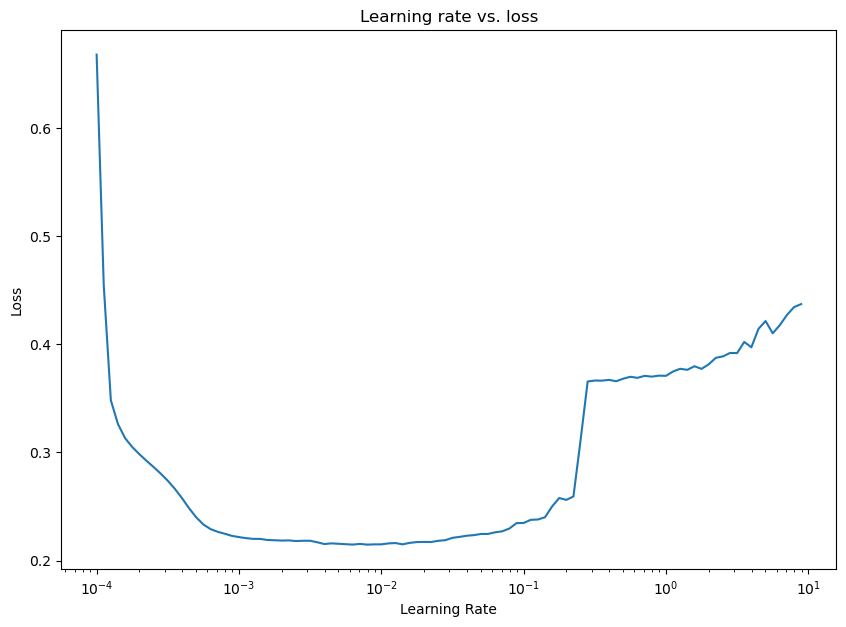

In [77]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

-->Best learning rate would be around 0.002

In [78]:
# Set the random seed
tf.random.set_seed(10)

# Create the model
model_10 = Sequential([
  Dense(4, activation="relu"),
  Dense(4, activation="relu"),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.002),                                
                metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)

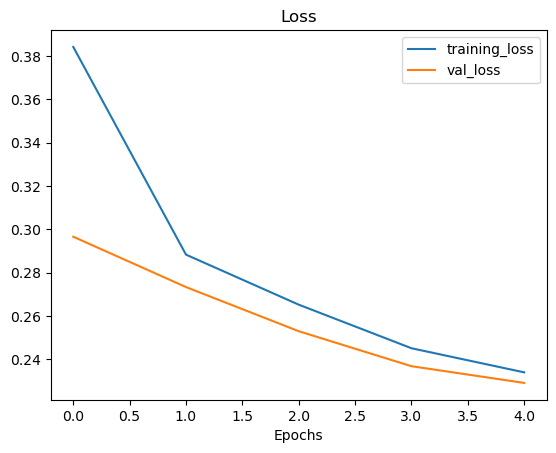

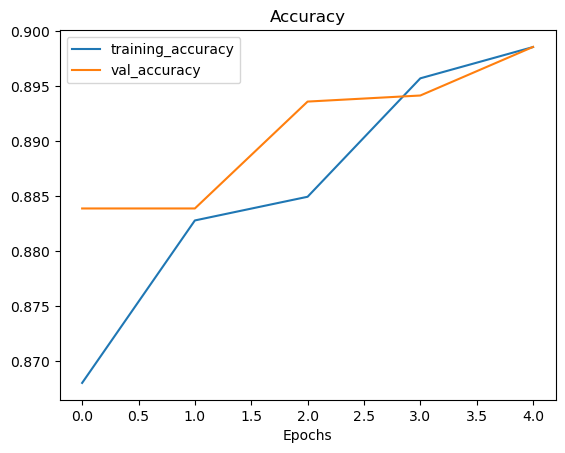

In [79]:
plot_loss_curves(history_10)

In [80]:
pred_10 = model_10.predict(X_test)
print(classification_report(y_test, tf.round(pred_10)))

283/283 [==============================] - 0s 218us/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7993
           1       0.58      0.47      0.52      1050

    accuracy                           0.90      9043
   macro avg       0.75      0.71      0.73      9043
weighted avg       0.89      0.90      0.89      9043



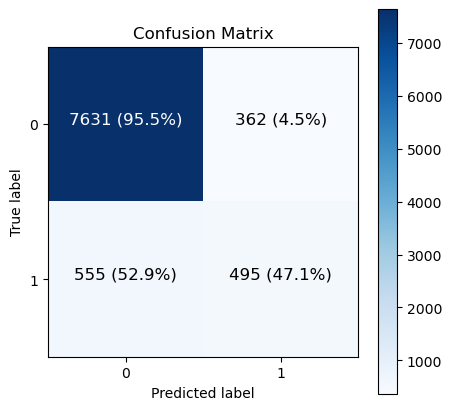

In [81]:
make_confusion_matrix(y_test, tf.round(pred_10), classes=None, figsize=(5, 5), text_size=12)

-->Recall for "1" is improved (0.41-->0.47)

#### 3. Increase the number of hidden units

In [83]:
# Set the random seed
tf.random.set_seed(10)

# Create the model
model_11 = Sequential([
  Dense(10, activation="relu"),
  Dense(10, activation="relu"),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_11.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.002),                                
                metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)

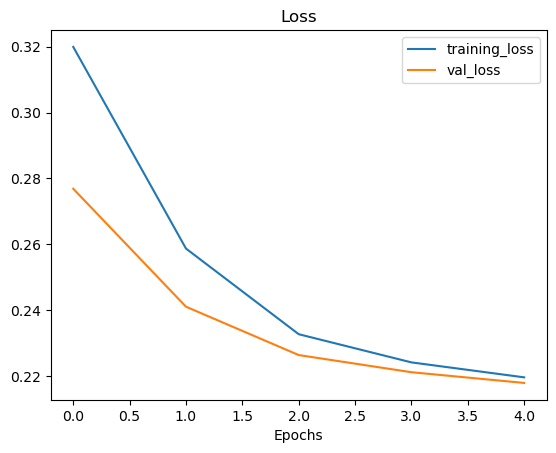

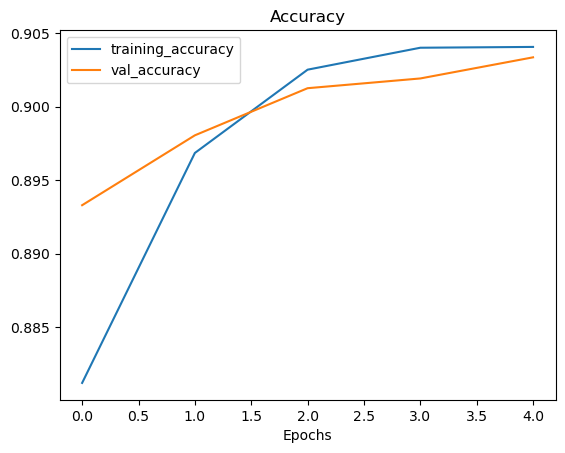

In [84]:
plot_loss_curves(history_11)

In [85]:
pred_11 = model_11.predict(X_test)
print(classification_report(y_test, tf.round(pred_11)))

283/283 [==============================] - 0s 194us/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7993
           1       0.60      0.50      0.55      1050

    accuracy                           0.90      9043
   macro avg       0.77      0.73      0.75      9043
weighted avg       0.90      0.90      0.90      9043



-->Recall for "1" is improved (0.47-->0.50)\
-->A further increase in units did not yield much improvement, but rather slightly worse results, so the unit is fixed at 10.

#### 7. Fitting for longer

In [86]:
# Set the random seed
tf.random.set_seed(10)

# Create the model
model_12 = Sequential([
  Dense(10, activation="relu"),
  Dense(10, activation="relu"),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_12.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.002),                                
                metrics=["accuracy"])

# Fit the model
history_12 = model_12.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

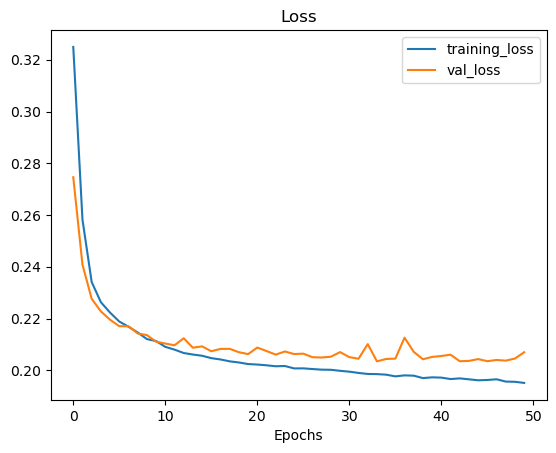

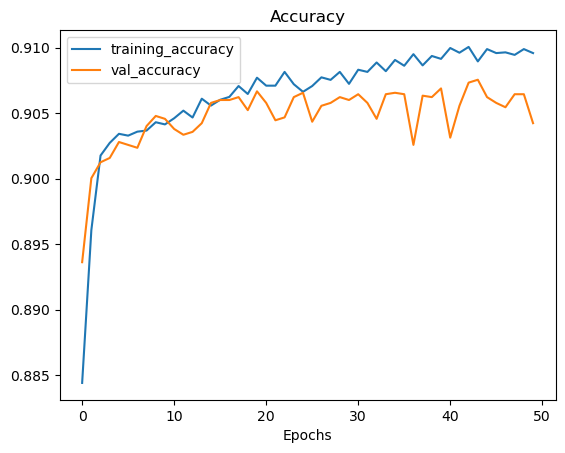

In [87]:
plot_loss_curves(history_12)

In [88]:
pred_12 = model_12.predict(X_test)
print(classification_report(y_test, tf.round(pred_12)))

283/283 [==============================] - 0s 194us/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7993
           1       0.59      0.58      0.59      1050

    accuracy                           0.90      9043
   macro avg       0.77      0.77      0.77      9043
weighted avg       0.90      0.90      0.90      9043



-->Recall for "1" is improved (0.50-->0.58)\
-->However, by increasing the number of epochs, the trend is starting to be volatile, so it seems better not to increase it any further.

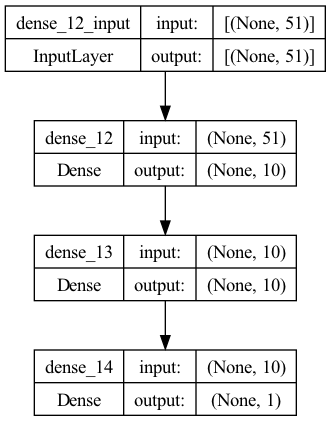

In [98]:
# See the inputs and outputs of each layer
from tensorflow.keras.utils import plot_model

plot_model(model_12, show_shapes=True)

## 6. Model comparison

In [89]:
report_DT = classification_report(y_test, pred_1b, output_dict=True)
report_RF = classification_report(y_test, pred_3b, output_dict=True)
report_XGB = classification_report(y_test, pred_2b, output_dict=True)
report_LR = classification_report(y_test, pred_4b, output_dict=True)
report_SVC = classification_report(y_test, pred_6b, output_dict=True)
report_NB = classification_report(y_test, pred_7b, output_dict=True)
report_NN = classification_report(y_test, tf.round(pred_12), output_dict=True)

report_DT = round(pd.DataFrame(report_DT).transpose(),2)
report_RF = round(pd.DataFrame(report_RF).transpose(),2)
report_XGB = round(pd.DataFrame(report_XGB).transpose(),2)
report_LR = round(pd.DataFrame(report_LR).transpose(),2)
report_SVC = round(pd.DataFrame(report_SVC).transpose(),2)
report_NB = round(pd.DataFrame(report_NB).transpose(),2)
report_NN = round(pd.DataFrame(report_NN).transpose(),2)

report_DT["Model"] = "DT"
report_RF["Model"] = "RF"
report_XGB["Model"] = "XGB"
report_LR["Model"] = "LR"
report_SVC["Model"] = "SVC"
report_NB["Model"] = "NB"
report_NN["Model"] = "NN"

In [90]:
summary_table = pd.concat([report_DT, report_RF, report_XGB, report_LR, report_SVC, report_NB, report_NN], keys=["DT", 'RF', 'XGB', "LR", "SVC", "NB", "NN"])
summary_table.iloc[:,:4]

precision  recall  f1-score  support
DT  0                  0.93    0.96      0.94  7993.00
    1                  0.58    0.42      0.49  1050.00
    accuracy           0.90    0.90      0.90     0.90
    macro avg          0.75    0.69      0.71  9043.00
    weighted avg       0.89    0.90      0.89  9043.00
RF  0                  0.90    0.99      0.95  7993.00
    1                  0.74    0.20      0.31  1050.00
    accuracy           0.90    0.90      0.90     0.90
    macro avg          0.82    0.60      0.63  9043.00
    weighted avg       0.88    0.90      0.87  9043.00
XGB 0                  0.93    0.96      0.95  7993.00
    1                  0.63    0.48      0.54  1050.00
    accuracy           0.91    0.91      0.91     0.91
    macro avg          0.78    0.72      0.75  9043.00
    weighted avg       0.90    0.91      0.90  9043.00
LR  0                  0.92    0.97      0.94  7993.00
    1                  0.63    0.33      0.43  1050.00
    accuracy           0.90    0.90      0.90     0.90
    macro avg          0.77    0.65      0.69  9043.00
    weighted avg       0.88    0.90      0.88  9043.00
SVC 0                  0.92    0.97      0.94  7993.00
    1                  0.60    0.36      0.45  1050.00
    accuracy           0.90    0.90      0.90     0.90
    macro avg          0.76    0.67      0.70  9043.00
    weighted avg       0.88    0.90      0.89  9043.00
NB  0                  0.93    0.89      0.91  7993.00
    1                  0.37    0.52      0.43  1050.00
    accuracy           0.84    0.84      0.84     0.84
    macro avg          0.65    0.70      0.67  9043.00
    weighted avg       0.87    0.84      0.85  9043.00
NN  0                  0.95    0.95      0.95  7993.00
    1                  0.59    0.58      0.59  1050.00
    accuracy           0.90    0.90      0.90     0.90
    macro avg          0.77    0.77      0.77  9043.00
    weighted avg       0.90    0.90      0.90  9043.00

In [91]:
all_model_result = pd.concat([report_DT, report_RF, report_XGB, report_LR, report_SVC, report_NB, report_NN], join="inner")
all_model_result = all_model_result.drop("support", axis=1)

In [92]:
all_model_result.loc["0"]

precision  recall  f1-score Model
0       0.93    0.96      0.94    DT
0       0.90    0.99      0.95    RF
0       0.93    0.96      0.95   XGB
0       0.92    0.97      0.94    LR
0       0.92    0.97      0.94   SVC
0       0.93    0.89      0.91    NB
0       0.95    0.95      0.95    NN

In [93]:
all_model_result.loc["1"]

precision  recall  f1-score Model
1       0.58    0.42      0.49    DT
1       0.74    0.20      0.31    RF
1       0.63    0.48      0.54   XGB
1       0.63    0.33      0.43    LR
1       0.60    0.36      0.45   SVC
1       0.37    0.52      0.43    NB
1       0.59    0.58      0.59    NN

In [94]:
all_model_result.loc["macro avg"]

precision  recall  f1-score Model
macro avg       0.75    0.69      0.71    DT
macro avg       0.82    0.60      0.63    RF
macro avg       0.78    0.72      0.75   XGB
macro avg       0.77    0.65      0.69    LR
macro avg       0.76    0.67      0.70   SVC
macro avg       0.65    0.70      0.67    NB
macro avg       0.77    0.77      0.77    NN

In [95]:
all_model_result.loc["weighted avg"]

precision  recall  f1-score Model
weighted avg       0.89    0.90      0.89    DT
weighted avg       0.88    0.90      0.87    RF
weighted avg       0.90    0.91      0.90   XGB
weighted avg       0.88    0.90      0.88    LR
weighted avg       0.88    0.90      0.89   SVC
weighted avg       0.87    0.84      0.85    NB
weighted avg       0.90    0.90      0.90    NN

In [96]:
acc_result = all_model_result.loc["accuracy"]
acc_result.index = acc_result["Model"]
acc_result.iloc[:,0]

Model
DT     0.90
RF     0.90
XGB    0.91
LR     0.90
SVC    0.90
NB     0.84
NN     0.90
Name: precision, dtype: float64

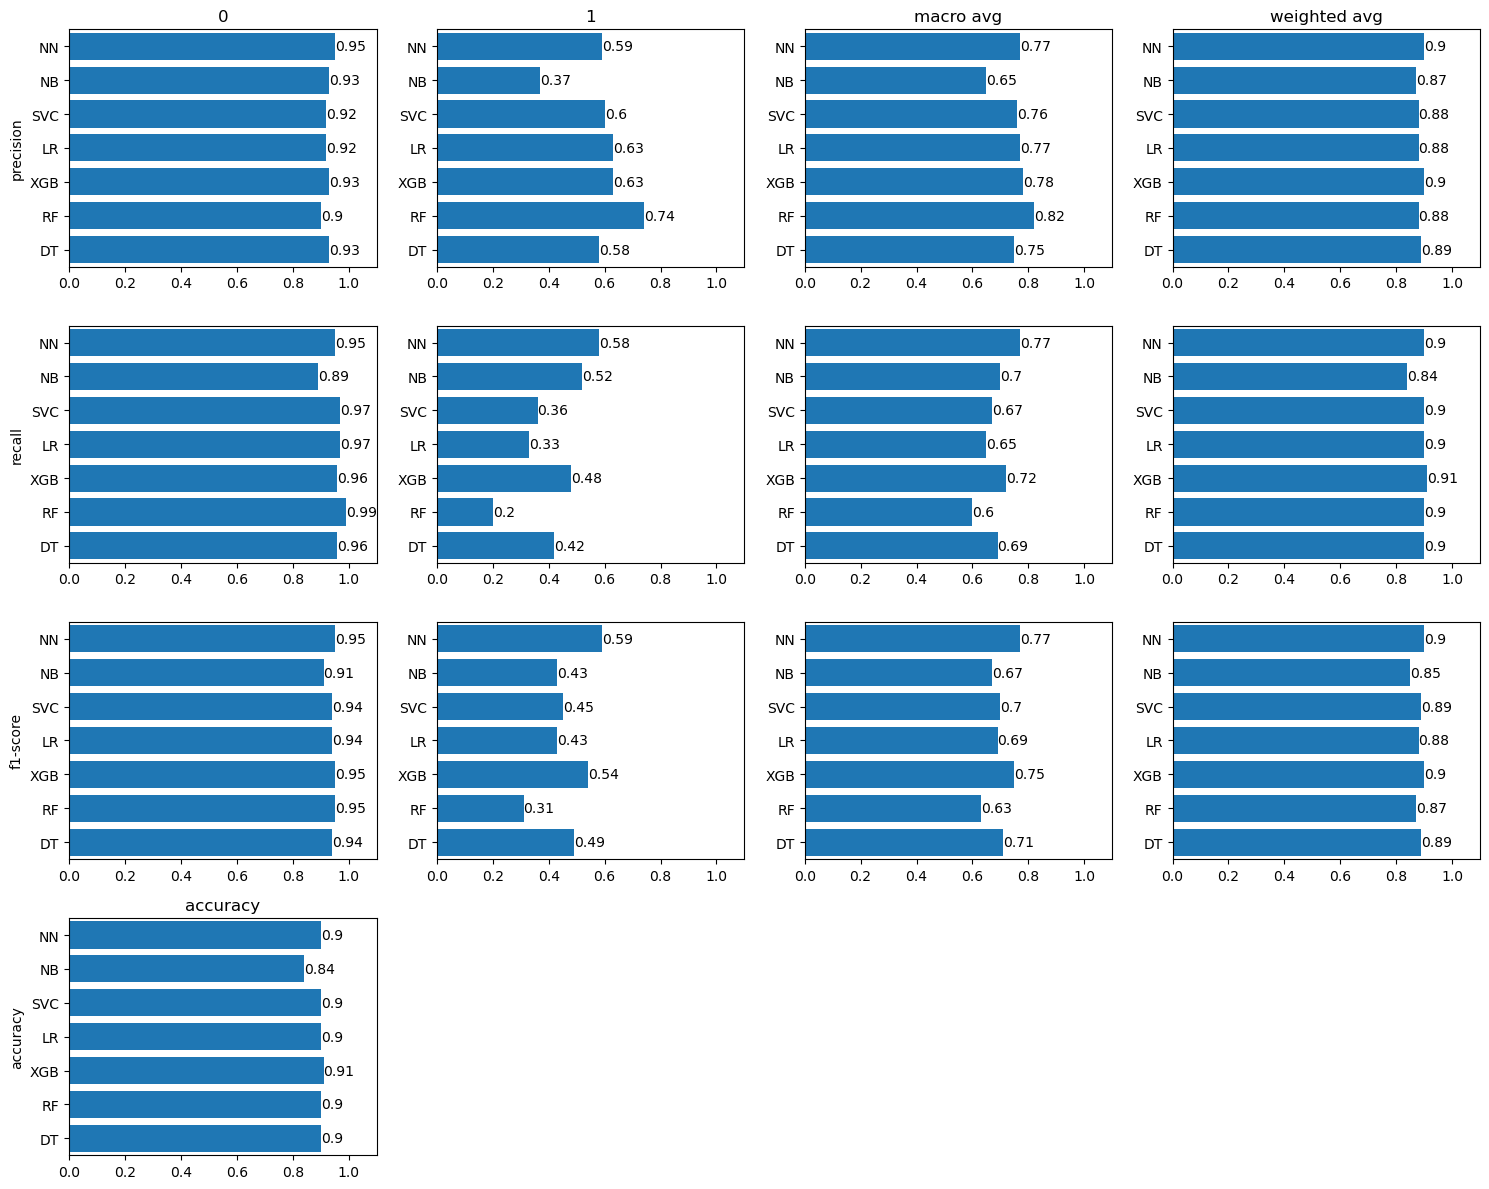

In [97]:
# Create subplots
fig, axs = plt.subplots(4, 4, figsize=(15, 12))

# 
all_model_result.loc["0"].plot(kind = "barh", x="Model", y="precision", ax = axs[0, 0])
axs[0, 0].set_title('0')
axs[0, 0].set_ylabel('precision')
p = axs[0, 0].barh(all_model_result.loc["0"]["Model"], all_model_result.loc["0"]["precision"])
axs[0, 0].bar_label(p)
axs[0, 0].get_legend().remove()
axs[0, 0].set_xlim(right=1.1)

# 
all_model_result.loc["1"].plot(kind = "barh", x="Model", y="precision", ax = axs[0, 1])
axs[0, 1].set_title('1')
axs[0, 1].set_ylabel("")
p = axs[0, 1].barh(all_model_result.loc["1"]["Model"], all_model_result.loc["1"]["precision"])
axs[0, 1].bar_label(p)
axs[0, 1].get_legend().remove()
axs[0, 1].set_xlim(right=1.1)

# 
all_model_result.loc["macro avg"].plot(kind = "barh", x="Model", y="precision", ax = axs[0, 2])
axs[0, 2].set_title('macro avg')
axs[0, 2].set_ylabel('')
p = axs[0, 2].barh(all_model_result.loc["macro avg"]["Model"], all_model_result.loc["macro avg"]["precision"])
axs[0, 2].bar_label(p)
axs[0, 2].get_legend().remove()
axs[0, 2].set_xlim(right=1.1)

# 
all_model_result.loc["weighted avg"].plot(kind = "barh", x="Model", y="precision", ax = axs[0, 3])
axs[0, 3].set_title('weighted avg')
axs[0, 3].set_ylabel('')
p = axs[0, 3].barh(all_model_result.loc["weighted avg"]["Model"], all_model_result.loc["weighted avg"]["precision"])
axs[0, 3].bar_label(p)
axs[0, 3].get_legend().remove()
axs[0, 3].set_xlim(right=1.1)



# 
all_model_result.loc["0"].plot(kind = "barh", x="Model", y="recall", ax = axs[1, 0])
axs[1, 0].set_ylabel('recall')
p = axs[1, 0].barh(all_model_result.loc["0"]["Model"], all_model_result.loc["0"]["recall"])
axs[1, 0].bar_label(p)
axs[1, 0].get_legend().remove()
axs[1, 0].set_xlim(right=1.1)

# 
all_model_result.loc["1"].plot(kind = "barh", x="Model", y="recall", ax = axs[1, 1])
axs[1, 1].set_ylabel('')
p = axs[1, 1].barh(all_model_result.loc["1"]["Model"], all_model_result.loc["1"]["recall"])
axs[1, 1].bar_label(p)
axs[1, 1].get_legend().remove()
axs[1, 1].set_xlim(right=1.1)

# 
all_model_result.loc["macro avg"].plot(kind = "barh", x="Model", y="recall", ax = axs[1, 2])
axs[1, 2].set_ylabel('')
p = axs[1, 2].barh(all_model_result.loc["macro avg"]["Model"], all_model_result.loc["macro avg"]["recall"])
axs[1, 2].bar_label(p)
axs[1, 2].get_legend().remove()
axs[1, 2].set_xlim(right=1.1)

# 
all_model_result.loc["weighted avg"].plot(kind = "barh", x="Model", y="recall", ax = axs[1, 3])
axs[1, 3].set_ylabel('')
p = axs[1, 3].barh(all_model_result.loc["weighted avg"]["Model"], all_model_result.loc["weighted avg"]["recall"])
axs[1, 3].bar_label(p)
axs[1, 3].get_legend().remove()
axs[1, 3].set_xlim(right=1.1)



# 
all_model_result.loc["0"].plot(kind = "barh", x="Model", y="f1-score", ax = axs[2, 0])
axs[2, 0].set_ylabel('f1-score')
p = axs[2, 0].barh(all_model_result.loc["0"]["Model"], all_model_result.loc["0"]["f1-score"])
axs[2, 0].bar_label(p)
axs[2, 0].get_legend().remove()
axs[2, 0].set_xlim(right=1.1)

# 
all_model_result.loc["1"].plot(kind = "barh", x="Model", y="f1-score", ax = axs[2, 1])
axs[2, 1].set_ylabel('')
p = axs[2, 1].barh(all_model_result.loc["1"]["Model"], all_model_result.loc["1"]["f1-score"])
axs[2, 1].bar_label(p)
axs[2, 1].get_legend().remove()
axs[2, 1].set_xlim(right=1.1)

# 
all_model_result.loc["macro avg"].plot(kind = "barh", x="Model", y="f1-score", ax = axs[2, 2])
axs[2, 2].set_ylabel('')
p = axs[2, 2].barh(all_model_result.loc["macro avg"]["Model"], all_model_result.loc["macro avg"]["f1-score"])
axs[2, 2].bar_label(p)
axs[2, 2].get_legend().remove()
axs[2, 2].set_xlim(right=1.1)

# 
all_model_result.loc["weighted avg"].plot(kind = "barh", x="Model", y="f1-score", ax = axs[2, 3])
axs[2, 3].set_ylabel('')
p = axs[2, 3].barh(all_model_result.loc["weighted avg"]["Model"], all_model_result.loc["weighted avg"]["f1-score"])
axs[2, 3].bar_label(p)
axs[2, 3].get_legend().remove()
axs[2, 3].set_xlim(right=1.1)



# 
all_model_result.loc["accuracy"].plot(kind = "barh", x="Model", y="precision", ax = axs[3, 0])
axs[3, 0].set_title('accuracy')
axs[3, 0].set_ylabel('accuracy')
p = axs[3, 0].barh(all_model_result.loc["accuracy"]["Model"], all_model_result.loc["accuracy"]["precision"])
axs[3, 0].bar_label(p)
axs[3, 0].get_legend().remove()
axs[3, 0].set_xlim(right=1.1)

# Hide last subplot (empty)
axs[3, 1].axis('off')
axs[3, 2].axis('off')
axs[3, 3].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

## 7. Summary

A bank may want to maximize the number of successful solicitations (high recall) without wasting resources on unlikely candidates (high precision). Therefore I suppose using the f1-score is desirable since both metrics are important. Moreover, since the number of objective variables is biased, evaluating the weighted average is preferable.
Looking at the weighted average, NN and XGB show the highest score(0.9). However, looking at the f1-score for "1", NN is slightly better than XGB respectively 0.59 and 0.54.
As a result, NN and XGB can be said to be the most accurate models for this problem. A possible reason is that XGB gives high accuracy even when missing values are included. This dataset did not contain any missing values, but it did contain multiple "unknown" values, so XGB may have been dominant. As for NN, it is excellent at extracting features, and it is assumed that good results were obtained by learning invisible features. Regarding further possible improvement, it would be to adjust the balance of the objective variable. This data set showed a large bias in the target variable. High accuracy was obtained for "0", which has a large number of data, but there was a tendency for the accuracy to be low for "1", which has a small number of data. There is a model that can predict "0" with high accuracy, so it seems possible to show higher accuracy than XGB and NN by adjusting the balance of objective variables.

## 8. Comparison with criteria

#### 1. Choose a scenario requiring reducing the decision-making time, such as house price assessment, cancer cell detection, etc.
    -->Prediction of bank customers applying for term deposits (reducing the decision-making time)
    
#### 2. Analyze the provided dataset. Use your knowledge of data analysis techniques to understand the data's structure, features, and potential challenges. Utilize techniques like data cleaning, feature engineering, and visualization to gain insights into the data's characteristics.\

    -->In the EDA section, the trends in the data set and the relationship between the objective variable and the explanatory variable were clarified to create a persona.
    
#### 3. Incorporate various visualization methods to glean deeper insights into the data's inherent characteristics. Utilize graphical representations, such as histograms, scatter plots, and box plots, to visualize distribution patterns, correlations, and potential outliers within the dataset. Consider employing heatmaps to assess feature correlations and identify potential multicollinearity. Moreover, leverage exploratory data analysis (EDA) techniques to uncover hidden relationships and trends that might be obscured in raw data.\

    -->Data visualization was conducted in multiple analyses for better understanding. (dataset, the relationship between the objective variable and explanatory variable, model evaluation, confusion matrix, decision tree, accuracy comparison of the evaluation model, etc.) These include heat maps, bar charts, histograms, etc. These methods clarified the relationship with the objective variable and allowed me to predict potential target customers (personas).
    
#### 4. Introduce the task of adding a classification column (1 or 0) to the dataset for supervised learning tasks. The purpose of this classification column is to represent the target variable or the outcome that the machine learning model will learn to predict.\
    -->The objective variables were changed to False=0 and True=1.
    
#### 5. Generate model pipelines to predict. Divide the data into training and testing sets, utilizing techniques from Deep Learning and Machine Learning to ensure a representative split.\

    -->The dataset was randomly split into train and test at a ratio of 8:2 using sklearn's train_test_split.
    
#### 6. Track and measure the outcomes from the models to ensure it is fair and created with accuracy.\
    -->The model was evaluated using not only accuracy but also precision, recall, and f1-score.

## 9. Additional questions 

#### 1.Explain the manual evaluation process and its execution without any involvement of machine learning algorithms.\
    -->Without using a machine learning algorithm, from the EDA results, users like those listed in the personas are more likely to apply for term deposits are predictable.
    
#### 2.Discuss how the manual evaluation process can be enhanced using machine learning-based solutions.
    -->Depending on the model, accuracy can be improved by adjusting the hyperparameters and repeatedly training to minimize the error.

#### 3.Detail the application of data transformation techniques, selection of appropriate algorithms, and tuning of parameters to construct model pipelines. Clarify how processes like data normalization, categorical variable encoding, and handling missing values contribute to model quality. Explain the choice of algorithms and the significance of parameter tuning to achieve optimal results.\
    -->Regarding the algorithm, models commonly used in classification problems and neural networks were utilized. As for model optimization, the former used GridSearcCV to optimize the hyperparameters. For the latter, optimization of the optimizer's learning rate, and adjustment of the number of Dence layer parameters and the number of epochs were performed. These adjustments affect the accuracy of the model as shown in the process above. In addition, regarding pre-processing, explanatory variables are changed from 0 to 1 by normalization for numerical values, and the data to be represented by 0 and 1 with get_dummy for objects. This process not only improves model accuracy but also speeds up learning.
    
#### 4.Emphasize the importance of tracking and measuring outcomes from AI models to ensure their fairness and accuracy. Describe how evaluation metrics, such as Mean Squared Error or accuracy, can be employed to validate model performance. Highlight the significance of addressing bias and ethical concerns to maintain a high standard of model creation.
    -->In addition to Accuracy, precision, recall, and f1-score were used as evaluation metrics. Precision includes "True Negatives" and can measure precision rate, and recall includes "False Negatives" and can measure recall rate. Both metrics are important for this issue, as explained in the Summary. Therefore, the f1-score that combines each is also important. Furthermore, the target variable is biased by the number of samples, so it is desirable to evaluate with a weighted average.
    
#### 5.Write about the observation of the model accuracy and confusion matrix. Discuss the rationale behind your dataset selection, including its meta-data information, and elaborate on its relevance to the chosen scenario.
Regarding accuracy, all models are able to make predictions with high accuracy. However, looking at the confusion matrix, "0" (False) can be predicted with high accuracy whereas the precision for "1" (True) is poor. As mentioned above, the bias in the objective variable would be one reason.

#### 6.Elaborate on the significance of splitting the dataset into two subsets, namely the training and testing sets. Explain how you accomplished this partitioning using the chosen classifier.
    -->As mentioned above, the dataset was randomly split into train and test at a ratio of 8:2 using sklearn's train_test_split.
    
#### 7.Provide insights into your approach for managing missing values, addressing outliers, performing feature engineering, and optimizing hyperparameters. If your data required any of these steps, explain how you would have tackled them.
    -->As for missing values, those are not included. Regarding performing feature engineering, "pdays" and "previous" had objective elements rather than continuous numerical data, so they were changed to 0 and 1. Regarding Optimizing hyperparameters, for Machine Learning GridSearchCV was used to find the optimal parameters. For the Neural network, Adam was used as the optimizer and searched for the optimal learning rate by utilizing callbacks.
    
#### 8.Could you elaborate on the integration of deep learning into your model and discuss its role in enhancing your results?
    -->The structure of the model consists of three layers: the input layer, the middle layer, and the output layer. For the activation function, ReLU is used for the first two layers, and sigmoid is used for the output layer since it is a binary problem. For the same reason, binary_crossentropy is chosen for Loss of Compile. Furthermore, the learning rate was optimized and the number of dense layer parameters was adjusted to optimize the model.

#### 9.Offer an explanation for the importance of precision and recall scores in evaluating model performance. Detail potential strategies for enhancing these scores with respect to your dataset.
    -->The importance of precision and recall was mentioned above. Regarding improving the score, as mentioned above, high accuracy has been achieved for "0" (False), so in order to achieve the same accuracy for "1"(True), it is necessary to adjust the balance of the objective variables. could be considered as one of the improvement ideas.
    
#### 10.Describe the role of visualization techniques in your analysis and emphasize the significance of the confusion matrix within the context of machine learning tasks
    -->As mentioned above, visualization is important to understanding the dataset and finding potential relationships between explanatory variables and objective variables. For example, by creating a confusion matrix, the difference in accuracy between "0" and "1" became clear, which helped in the analysis.
    
#### 11.Please give reference of the dataset by giving detail about the link.
    -->https://archive.ics.uci.edu/dataset/222/bank+marketing
    
#### 12.Please submit Code files and report pdf.
    -->Attached (Code and report are created in the same file)